8-13 um points: 63
lambda range: 8.0014 12.962


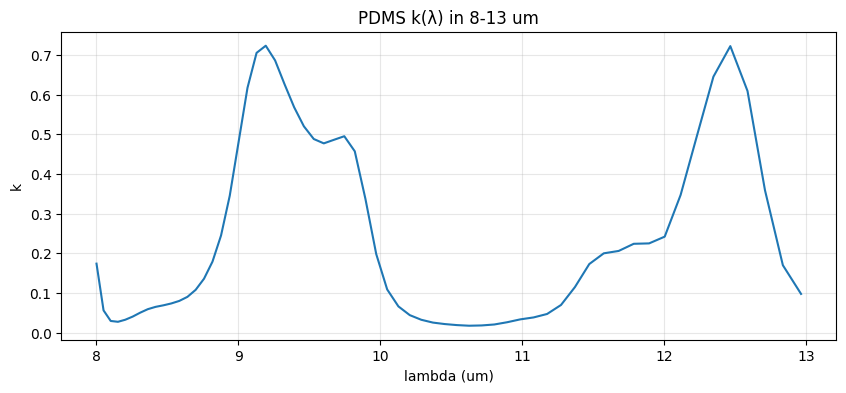

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("PSDM.xlsx")
df = df.sort_values("lambda_um")

win = df[(df["lambda_um"]>=8) & (df["lambda_um"]<=13)]
print("8-13 um points:", len(win))
print("lambda range:", win["lambda_um"].min(), win["lambda_um"].max())

plt.figure(figsize=(10,4))
plt.plot(win["lambda_um"], win["k"])
plt.xlabel("lambda (um)")
plt.ylabel("k")
plt.title("PDMS k(λ) in 8-13 um")
plt.grid(True, alpha=0.3)
plt.savefig("k_lambda.png")
plt.show()


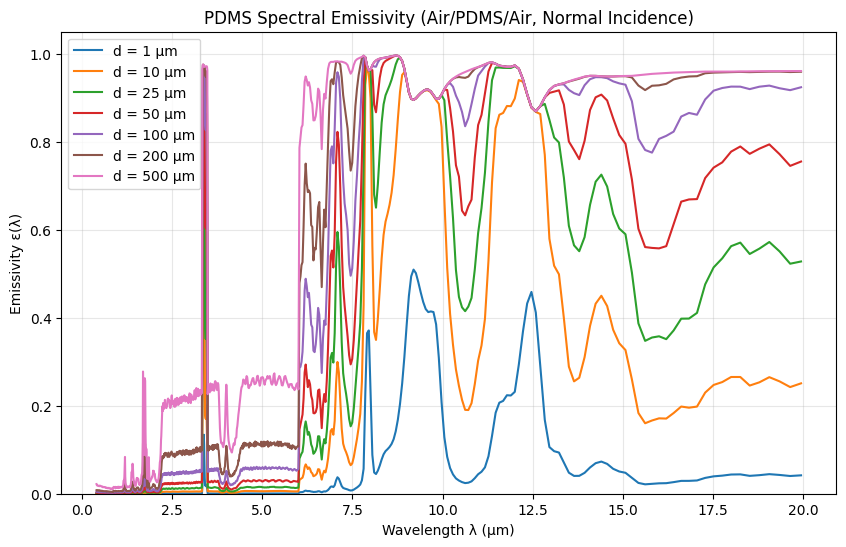

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ===== 1) 读取数据（列名固定：lambda_um, n, k）=====
df = pd.read_excel("PSDM.xlsx")
df = df.sort_values("lambda_um")

lam = df["lambda_um"].to_numpy()          # um
n1  = df["n"].to_numpy()
k1  = df["k"].to_numpy()
n1c = n1 + 1j * k1                         # complex refractive index

# ===== 2) 稳定的单层薄膜（Fabry–Perot）正入射：空气/薄膜/空气 =====
# n0 = ns = 1 (air)
n0 = 1.0 + 0j
ns = 1.0 + 0j

def emissivity_single_film_air_air(lam_um, n_film_complex, d_um):
    # 单程传播因子 p = exp(i * 2π * ñ * d / λ)（ñ 复数 -> 自动包含衰减）
    beta = 2 * np.pi * n_film_complex * d_um / lam_um
    p = np.exp(1j * beta)

    # Fresnel 振幅系数（正入射）
    r01 = (n0 - n_film_complex) / (n0 + n_film_complex)
    r12 = (n_film_complex - ns) / (n_film_complex + ns)
    t01 = 2 * n0 / (n0 + n_film_complex)
    t12 = 2 * n_film_complex / (n_film_complex + ns)

    denom = 1 + r01 * r12 * (p ** 2)
    r = (r01 + r12 * (p ** 2)) / denom
    t = (t01 * t12 * p) / denom

    R = np.abs(r) ** 2
    T = np.real(ns / n0) * (np.abs(t) ** 2)  # 这里就是 |t|^2
    A = 1 - R - T
    eps = A                                  # ε(λ)=A(λ)

    return eps

# ===== 3) 厚度列表（um）=====
thickness_list_um = [1, 10, 25, 50, 100, 200, 500]

# ===== 4) 画图 =====
plt.figure(figsize=(10, 6))
for d in thickness_list_um:
    eps = emissivity_single_film_air_air(lam, n1c, d)
    plt.plot(lam, eps, label=f"d = {d} μm")

plt.xlabel("Wavelength λ (μm)")
plt.ylabel("Emissivity ε(λ)")
plt.title("PDMS Spectral Emissivity (Air/PDMS/Air, Normal Incidence)")
plt.ylim(0, 1.05)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()
